In [63]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [64]:
DATA_DIR = 'data/kmeans/'

## k - means

In [112]:
def loadDataSet(filename):
    fr = open(filename)
    dataList = []
    for line in fr.readlines():
        lineList = line.split('\t')
        lineList = map(np.float, lineList)
        dataList.append(lineList)
    return np.array(dataList)

def distEuclidean(vecA, vecB):
    return np.sqrt(np.sum( (vecA - vecB)**2 ))

def randCent(dataArr, k):
    n = np.shape(dataArr)[1]
    centroids = np.zeros((k, n))
    for j in range(n):
        minJ = np.min(dataArr[:,j], axis=0)
        maxJ = np.max(dataArr[:,j], axis=0)
        rangeJ = float(maxJ - minJ)
        centroids[:, j] = np.array(minJ + rangeJ * np.random.rand(k, 1))[:,0]
    return centroids

def kMeans(dataArr, k, distFunc = distEuclidean, centInitializeFunt = randCent):
    m, n = dataArr.shape
    clusterAssigment = np.zeros((m, 2)) # save cluster id and distance 
    centroids = centInitializeFunt(dataArr, k)
    clusterChanged = True
    while clusterChanged : 
        clusterChanged = False
        for i in range(m): # for each data point
            minDist = np.inf
            minInd = -1
            for j in range(k): # to find the nearest centroids
                dist = distFunc(centroids[j,:] , dataArr[i, :])
                if dist < minDist:
                    minDist = dist
                    minInd = j
            if clusterAssigment[i][0] != minInd:
                clusterChanged = True
            clusterAssigment[i] = minInd, minDist**2
        print(centroids)
        
        # undate centroids
        for cent in range(k):
            cluster = dataArr[clusterAssigment[:,0] ==  cent]
            centroids[cent,:] = cluster.mean(axis=0)     
    return centroids, clusterAssigment

(80, 2)
[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]]
5.18463281668


[[ 0.63365843  5.17861864]
 [-3.2541875  -0.274783  ]]


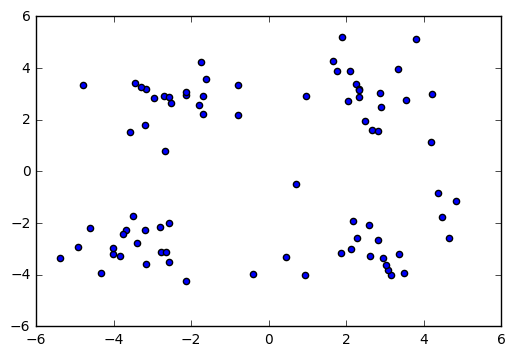

In [102]:
dataArr = loadDataSet(DATA_DIR + 'testSet.txt')
print(dataArr.shape)
print(dataArr[:3,:])
plt.scatter(dataArr[:,0], dataArr[:,1])
print(distEuclidean(dataArr[0,:], dataArr[1,:]))
print("\n")
print(randCent(dataArr, 2))

[[-5.33331706 -3.88794983]
 [ 3.34554839  4.99543673]
 [-2.56412516 -0.44443774]
 [-1.93643617  3.22358049]]
[[-3.84171592 -3.19576733]
 [ 2.965825    2.52322536]
 [ 0.53980567 -2.56194522]
 [-2.21112468  2.96604563]]
[[-3.53973889 -2.89384326]
 [ 2.80642645  2.73635527]
 [ 2.44502437 -2.980011  ]
 [-2.46154315  2.78737555]]
[[-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]]


(80, 2)
[[-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]]
[ 0.  1.  2.  3.]




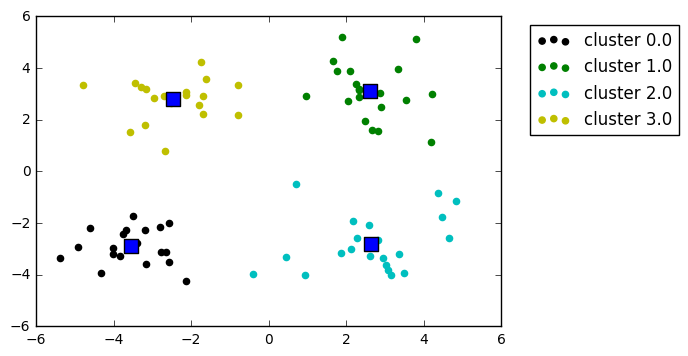

In [104]:
centroids, clusterAssigment = kMeans(dataArr, 4)
clusterID = np.unique(clusterAssigment[:,0])
print('\n')
print(np.shape(clusterAssigment))
print(centroids)
print(clusterID)
print('\n')
colors = ['k', 'g', 'c', 'y']
for i, c in enumerate(colors):
    cluster = dataArr[clusterAssigment[:,0] == clusterID[i]]
    plt.scatter(cluster[:,0], cluster[:, 1], label="cluster {}".format(clusterID[i]), color = c)
    plt.scatter(centroids[i,0], centroids[i,1], s=100, marker='s')
plt.legend(loc='best', bbox_to_anchor=(1.4,1))

## K-Means improvement -- Bisecting K-means

In [130]:
def bisectingKmeans(dataArr, k, distFunc = distEuclidean, centInitializeFunt = randCent):
    m, n = dataArr.shape
    clusterAssigment = np.zeros((m, 2))
    
    # initialization
    centroid0 = dataArr.mean(axis=0) # all data in a cluster
    centroidList = [centroid0]
    for i in range(m):
        clusterAssigment[i, 1] = distFunc(centroid0, dataArr[i,:])**2  # error = sum 
    
    while(len(centroidList) < k): # choose an appropriate cluster split into two subcluster in each iteration
        lowestErr = np.inf
        for i in range(len(centroidList)): # try to split each cluster
            clusterArr = dataArr[clusterAssigment[:,0] == i, :]
            centroidTemp, clusterAssTemp = kMeans(clusterArr, 2, distFunc, centInitializeFunt)
            errSplit = clusterAssTemp[:,1].sum()
            errNoSplit = np.sum(clusterAssigment[clusterAssigment[:,0] != i, 1])
            print('split error: ', errSplit, 'not split error: ', errNoSplit)
            if (errSplit + errNoSplit) < lowestErr:
                lowestErr = errSplit + errNoSplit
                bestCentIndToSplit = i
                bestCents = centroidTemp
                bestClusterAssigment = clusterAssTemp
                
        # update some parameter of best split cluster
        bestClusterAssigment[bestClusterAssigment[:,0] == 0, 0] = bestCentIndToSplit
        bestClusterAssigment[bestClusterAssigment[:,0] == 1, 0] = len(centroidList)
        print("the best index to split is :", bestCentIndToSplit)
        print("the length of best cluster assigment is :", len(bestClusterAssigment))
        
        # add best cluster into whole cluster
        centroidList[bestCentIndToSplit] = bestCents[0,:]
        centroidList.append(bestCents[1,:])
        clusterAssigment[clusterAssigment[:,0] == bestCentIndToSplit, :] = bestClusterAssigment
    
    return np.array(centroidList), clusterAssigment

(60, 2)
[[ 3.275154  2.957587]
 [-3.344465  2.603513]]


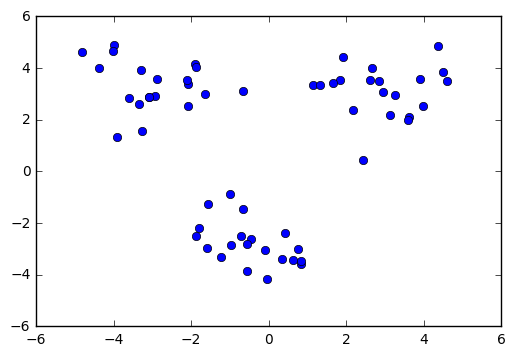

In [127]:
dataArr = loadDataSet(DATA_DIR + 'testSet2.txt')
print(dataArr.shape)
print(dataArr[:2, :])
plt.plot(dataArr[:,0], dataArr[:,1], 'o')

[[ 3.82953411  2.43558161]
 [ 0.58369735  4.22189685]]
[[ 1.725858    0.00458179]
 [-1.91978216  2.36732048]]
[[ 1.22145534 -0.02084897]
 [-2.53993945  3.37782127]]
[[ 1.23710375  0.17480612]
 [-2.94737575  3.3263781 ]]
('split error: ', 570.72275742467548, 'not split error: ', 0.0)
('the best index to split is :', 0)
('the length of best cluster assigment is :', 60)
[[ 2.97775674 -1.22101282]
 [ 1.79104936  0.57737268]]
[[-0.15366667 -3.15354   ]
 [ 2.071566    2.1718138 ]]
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
('split error: ', 68.68654812621844, 'not split error: ', 38.062950635657558)
[[-2.70531045  3.64757197]
 [-2.83614124  2.61212017]]
[[-2.80416875  3.91101575]
 [-3.16218625  2.44942162]]
('split error: ', 27.193667836261877, 'not split error: ', 532.65980678901781)
('the best index to split is :', 0)
('the length of best cluster assigment is :', 40)
('cluster id: ', array([ 0.,  1.,  2.]))


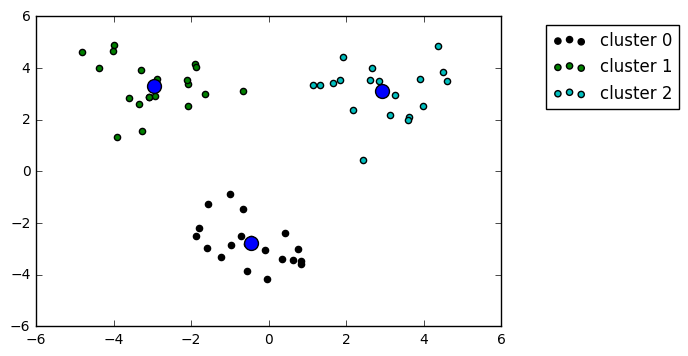

In [128]:
centroidArr, clusterAssigment = bisectingKmeans(dataArr, 3)

colors = ['k', 'g', 'c']
clusterId = np.unique(clusterAssigment[:,0])
print("cluster id: ", clusterId)
for i, cid in enumerate(clusterId):
    cluster = dataArr[clusterAssigment[:,0] == cid, :]
    plt.scatter(cluster[:,0], cluster[:,1], c=colors[i], label="cluster {}".format(i))
    plt.scatter(centroidArr[i, 0], centroidArr[i, 1], s=100)

plt.legend(loc='best', bbox_to_anchor=(1.4,1))